In [402]:
%reload_ext autoreload
%autoreload 2

In [403]:
import math
import features
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
f = features.Feature()
f.temperature = 0.1
f.select()
fs = features.FeatureSelector(4, 1)

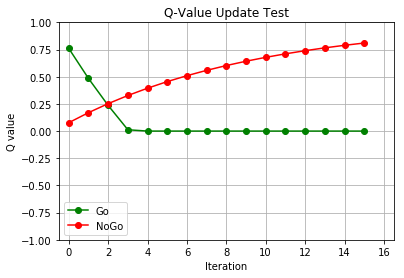

In [431]:
fs.ncorrect = 1
fs.generate_target()
f = features.Feature()
f.anticorrelated = True
f.go = 0.76
f.temperature = 0.2
f.alpha = 0.1
f.d1 = 2
f.lowbounded = True
vals = [[f.go, f.nogo]]
for i in range(15):
    f.select();
    if f.selected:
        f.update(-1)
    else:
        f.update(1)
    vals.append([f.go, f.nogo])
    
xs = list(range(len(vals)))
plt.axis([-0.5, len(vals) + 0.5, -1, 1])
plt.ylabel("Q value")
plt.xlabel("Iteration")
plt.title("Q-Value Update Test")
goes = [x[0] for x in vals]
nogoes = [x[1] for x in vals]
plt.plot(xs, goes, "o-", color="green")
plt.plot(xs, nogoes, "o-", color="red")
plt.grid()
plt.legend(["Go", "NoGo"], loc="best")
plt.show()


In [445]:
res = {}
nfeat = 7
ncorrect = 1
alpha = 0.1
temp = 0.1
nsims = 500
anticorrelated = True
maxruns = 2000
lowbounded = True

d_vals = [x/100.0 for x in list(range(0, 201, 20))]

for d in d_vals:
    name = "%.1f" % d
    fs = features.FeatureSelector(nfeatures = nfeat, ncorrect = ncorrect,  maxruns = maxruns)
    fs.alpha = alpha
    fs.temperature = temp
    fs.anticorrelated = anticorrelated
    fs.lowbounded = lowbounded
    
    fs.d2 = d
    
    res[name] = []
    partial = []
    for n in range(nsims):
        partial.append(fs.simulate())
    res[name].append(np.mean(partial))
    
d2_res = res

res = {}
for d in d_vals:
    name = "%.1f" % d
    fs = features.FeatureSelector(nfeatures = nfeat, ncorrect = ncorrect,  maxruns = maxruns)
    fs.alpha = alpha
    fs.temperature = temp
    fs.anticorrelated = anticorrelated
    fs.lowbounded = lowbounded
    
    fs.d1 = d
    
    res[name] = []
    partial = []
    for n in range(nsims):
        partial.append(fs.simulate())
    res[name].append(np.mean(partial))

d1_res = res
    



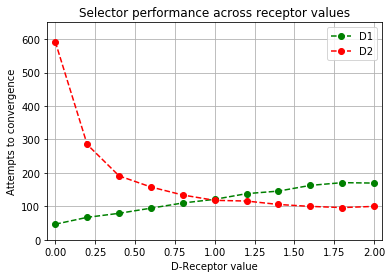

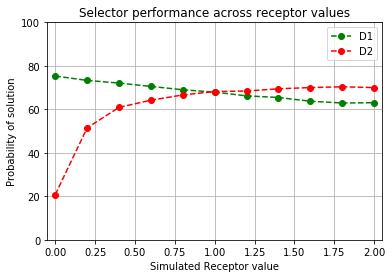

[True, True, True, True, True, True, True]

In [460]:
plt.axis([-0.05, 2.05, 0, 650])
plt.ylabel("Attempts to convergence")
plt.xlabel("D-Receptor value")
plt.title("Selector performance across receptor values")
d2y = [d2_res["%.1f" % x] for x in d_vals]
d1y = [d1_res["%.1f" % x] for x in d_vals]
plt.plot(d_vals, d1y, "o--", color="green")
plt.plot(d_vals, d2y, "o--", color="red")
plt.grid()
plt.legend(["D1", "D2"], loc="best")
plt.show()
[f.lowbounded for f in fs.features]

plt.axis([-0.05, 2.05, 0, 100])
plt.ylabel("Probability of solution")
plt.xlabel("Simulated Receptor value")
plt.title("Selector performance across receptor values")
ad2y = [(800 - x[0])/10.0 for x in d2y]
ad1y = [(800 - x[0])/10.0 for x in d1y]
plt.plot(d_vals, ad1y, "o--", color="green")
plt.plot(d_vals, ad2y, "o--", color="red")
plt.grid()
plt.legend(["D1", "D2"], loc="best")
plt.show()
[f.lowbounded for f in fs.features]
